# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

<span style="color:red">Este projeto tem como objetivo analisar características demográficas e socioeconômicas dos clientes, como idade, sexo, educação, posse de veículo e imóvel, renda e outras variáveis. A partir dos dados coletados, busca-se compreender melhor o perfil dos clientes e suas condições de vida. Isso inclui a quantidade de filhos, tipo de residência, tempo de emprego e a quantidade de pessoas na residência, entre outros aspectos. A análise ajudará a obter insights valiosos sobre as necessidades e comportamentos dos clientes.</span>


## Etapa 2 Crisp-DM: Entendimento dos dados
<span style="color:red"></span>


### Dicionário de dados

<span style="color:red">ESCREVER AQUI</span>


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de referência de coleta das variáveis                                     | object |
| id_cliente              |  Código de identificação do cliente                                    | int64 |
| sexo                    |  Sexo do cliente                                      | object|
| posse_de_veiculo        |  Indica se o cliente possui veículo                                   | bool|
| posse_de_imovel         | 	Indica se o cliente possui imóvel                                     | bool|
| qtd_filhos              |  	Quantidade de filhos do cliente                                     | int64|
| tipo_renda              | 	Tipo de renda do cliente                                     | object|
| educacao                |  	Grau de instrução do cliente                                     | object|
| estado_civil            |  	Estado civil do cliente                                     | object|
| tipo_residencia         |  Tipo de residência do cliente (própria, alugada etc)                                    | object|
| idade                   |  	Idade do cliente                                    | int64|
| tempo_emprego           |  	Tempo no emprego atual                                      | float64|
| qt_pessoas_residencia   | 	Quantidade de pessoas que moram na residência                                     | float64|
| renda                   |  	Renda em reais                                   |float64|





<span style="color:red">Bibliotecas</span>


In [49]:
!pip install ydata-profiling

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
import numpy as np

In [51]:
renda = pd.read_csv('/content/previsao_de_renda.csv')

In [52]:
renda.head(1)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis.

In [53]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [54]:
prof.to_file('/content/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Entendimento dos dados - Bivariadas




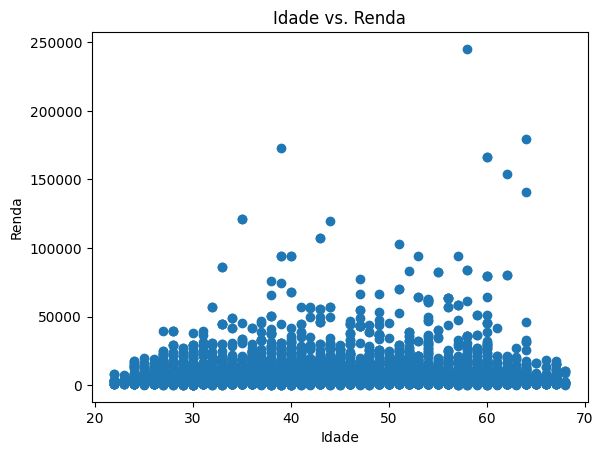

In [55]:
plt.scatter(renda['idade'], renda['renda'])
plt.xlabel('Idade')
plt.ylabel('Renda')
plt.title('Idade vs. Renda')
plt.show()

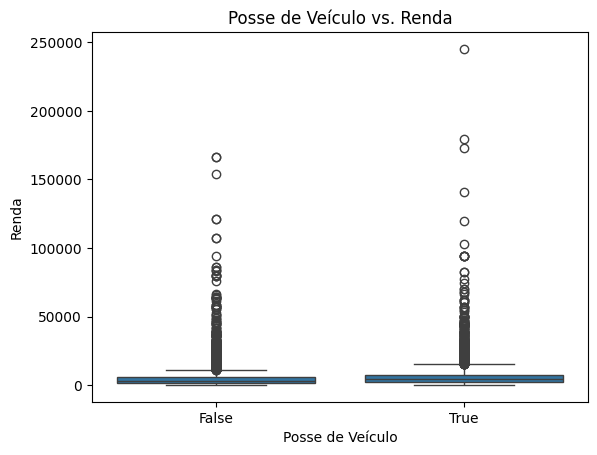

In [56]:
sns.boxplot(x='posse_de_veiculo', y='renda', data=renda)
plt.xlabel('Posse de Veículo')
plt.ylabel('Renda')
plt.title('Posse de Veículo vs. Renda')
plt.show()

In [57]:
tabela_contingencia = pd.crosstab(renda['estado_civil'], renda['tipo_residencia'])
tabela_contingencia

tipo_residencia,Aluguel,Casa,Com os pais,Comunitário,Estúdio,Governamental
estado_civil,,,,,,
Casado,117,9535,440,49,63,330
Separado,5,796,50,1,4,23
Solteiro,54,1553,115,9,9,58
União,15,974,68,0,7,14
Viúvo,3,674,2,5,0,27


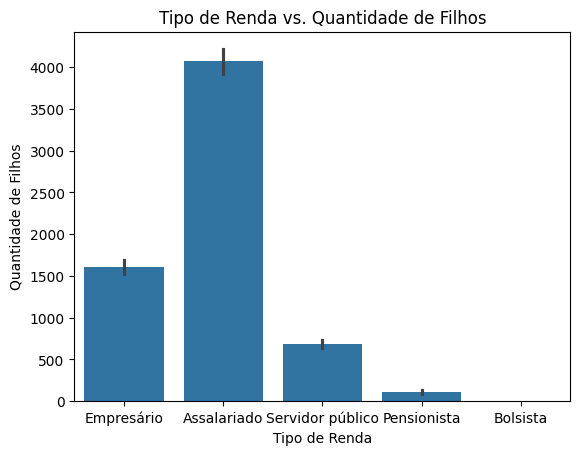

In [58]:
sns.barplot(x='tipo_renda', y='qtd_filhos', data=renda, estimator=sum)
plt.xlabel('Tipo de Renda')
plt.ylabel('Quantidade de Filhos')
plt.title('Tipo de Renda vs. Quantidade de Filhos')
plt.show()

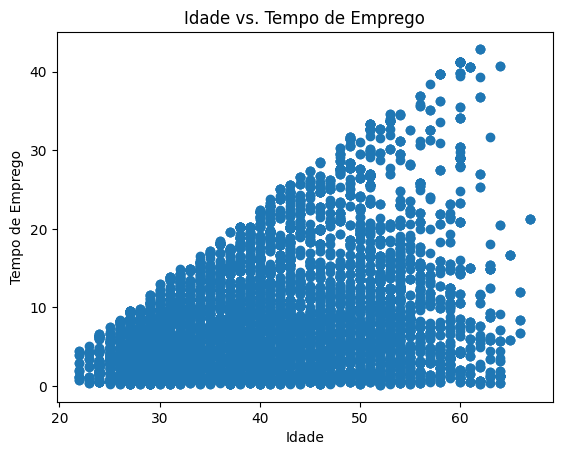

In [59]:
plt.scatter(renda['idade'], renda['tempo_emprego'])
plt.xlabel('Idade')
plt.ylabel('Tempo de Emprego')
plt.title('Idade vs. Tempo de Emprego')
plt.show()

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [60]:
# Criar novas variáveis
renda['idade_emprego_ratio'] = renda['tempo_emprego'] / (renda['idade'] + 1)  # Adicionar 1 para evitar divisão por zero
renda['densidade_dependentes'] = renda['qtd_filhos'] / renda['qt_pessoas_residencia']
renda['renda_per_capita'] = renda['renda'] / renda['qt_pessoas_residencia']
renda['estabilidade_renda'] = renda['tipo_renda'].apply(lambda x: 1 if x in ['Assalariado', 'Empresário'] else 0)
renda['posse_bens'] = renda['posse_de_veiculo'].astype(int) + renda['posse_de_imovel'].astype(int)
renda['hist_emprego'] = renda['tempo_emprego'] / renda['idade']
renda['educacao_tipo_renda'] = renda['educacao'].astype(str) + '_' + renda['tipo_renda'].astype(str)
renda = pd.get_dummies(renda, columns=['educacao_tipo_renda'], drop_first=True)

# Visualizar as primeiras linhas do DataFrame com as novas variáveis
renda.head()


,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,...,educacao_tipo_renda_Secundário_Servidor público,educacao_tipo_renda_Superior completo_Assalariado,educacao_tipo_renda_Superior completo_Bolsista,educacao_tipo_renda_Superior completo_Empresário,educacao_tipo_renda_Superior completo_Pensionista,educacao_tipo_renda_Superior completo_Servidor público,educacao_tipo_renda_Superior incompleto_Assalariado,educacao_tipo_renda_Superior incompleto_Empresário,educacao_tipo_renda_Superior incompleto_Pensionista,educacao_tipo_renda_Superior incompleto_Servidor público
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,...,False,False,False,False,False,False,False,False,False,False
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,...,False,True,False,False,False,False,False,False,False,False
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,...,False,False,False,True,False,False,False,False,False,False
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,...,False,False,False,False,False,True,False,False,False,False
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,...,False,False,False,False,False,False,False,False,False,False


In [61]:
# Selecionar as variáveis independentes (features) e a variável dependente (target)
X = renda[['idade', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
           'tipo_residencia', 'tempo_emprego', 'qt_pessoas_residencia', 'idade_emprego_ratio', 'densidade_dependentes',
           'renda_per_capita', 'estabilidade_renda', 'posse_bens', 'hist_emprego']]
y = renda['renda']

# Codificação one-hot para variáveis categóricas
X = pd.get_dummies(X, columns=['tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True)

# Verificar as primeiras linhas do DataFrame de features
print("Primeiras linhas do DataFrame de features (X):")
print(X.head())

# Verificar as informações do DataFrame de features
print("\nInformações do DataFrame de features (X):")
print(X.info())

# Verificar a quantidade de valores ausentes por coluna
print("\nQuantidade de valores ausentes por coluna:")
print(X.isnull().sum())


Primeiras linhas do DataFrame de features (X):
   idade  posse_de_veiculo  posse_de_imovel  qtd_filhos  tempo_emprego  \
0     26             False             True           0       6.602740   
1     28              True             True           0       7.183562   
2     35              True             True           0       0.838356   
3     30             False             True           1       4.846575   
4     33              True            False           0       4.293151   

   qt_pessoas_residencia  idade_emprego_ratio  densidade_dependentes  \
0                    1.0             0.244546               0.000000   
1                    2.0             0.247709               0.000000   
2                    2.0             0.023288               0.000000   
3                    3.0             0.156341               0.333333   
4                    1.0             0.126269               0.000000   

   renda_per_capita  estabilidade_renda  ...  educacao_Superior incompleto 

In [62]:
# Verificar a quantidade de valores ausentes por coluna
print("\nQuantidade de valores ausentes por coluna:")
print(X.isnull().sum())



Quantidade de valores ausentes por coluna:
idade                               0
posse_de_veiculo                    0
posse_de_imovel                     0
qtd_filhos                          0
tempo_emprego                    2573
qt_pessoas_residencia               0
idade_emprego_ratio              2573
densidade_dependentes               0
renda_per_capita                    0
estabilidade_renda                  0
posse_bens                          0
hist_emprego                     2573
tipo_renda_Bolsista                 0
tipo_renda_Empresário               0
tipo_renda_Pensionista              0
tipo_renda_Servidor público         0
educacao_Pós graduação              0
educacao_Secundário                 0
educacao_Superior completo          0
educacao_Superior incompleto        0
estado_civil_Separado               0
estado_civil_Solteiro               0
estado_civil_União                  0
estado_civil_Viúvo                  0
tipo_residencia_Casa                0
tipo_r

In [63]:
# Imputação de valores faltantes
X['idade'].fillna(X['idade'].mean(), inplace=True)
X['tempo_emprego'].fillna(X['tempo_emprego'].mean(), inplace=True)
X['posse_de_veiculo'].fillna(X['posse_de_veiculo'].mode()[0], inplace=True)
X['posse_de_imovel'].fillna(X['posse_de_imovel'].mode()[0], inplace=True)
X['qtd_filhos'].fillna(X['qtd_filhos'].mean(), inplace=True)
X['qt_pessoas_residencia'].fillna(X['qt_pessoas_residencia'].mean(), inplace=True)
X['idade_emprego_ratio'].fillna(X['idade_emprego_ratio'].mean(), inplace=True)
X['densidade_dependentes'].fillna(X['densidade_dependentes'].mean(), inplace=True)
X['renda_per_capita'].fillna(X['renda_per_capita'].mean(), inplace=True)
X['estabilidade_renda'].fillna(X['estabilidade_renda'].mode()[0], inplace=True)
X['posse_bens'].fillna(X['posse_bens'].mean(), inplace=True)
X['hist_emprego'].fillna(X['hist_emprego'].mean(), inplace=True)

# Verificar novamente a quantidade de valores ausentes após a imputação
print("\nQuantidade de valores ausentes após a imputação:")
print(X.isnull().sum())

# REMOVIDO: Codificação one-hot para variáveis categóricas, pois já foi feita anteriormente
# X = pd.get_dummies(X, columns=['tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True)

# Verificar tipos de dados das colunas
print("\nTipos de dados das colunas:")
print(X.dtypes)

# Converter variáveis categóricas para tipo 'category'
categorical_columns = ['posse_de_veiculo', 'posse_de_imovel']
for col in categorical_columns:
    if col in X.columns:
        X[col] = X[col].astype('category')

# Padronizar as variáveis numéricas
scaler = StandardScaler()
numerical_columns = ['idade', 'tempo_emprego', 'qt_pessoas_residencia', 'idade_emprego_ratio', 'densidade_dependentes', 'renda_per_capita', 'hist_emprego']
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Visualizar as primeiras linhas do DataFrame ajustado
print("\nPrimeiras linhas do DataFrame ajustado:")
print(X.head())

# Verificar tipos de dados após os ajustes
print("\nTipos de dados após ajustes:")
print(X.dtypes)


Quantidade de valores ausentes após a imputação:
idade                            0
posse_de_veiculo                 0
posse_de_imovel                  0
qtd_filhos                       0
tempo_emprego                    0
qt_pessoas_residencia            0
idade_emprego_ratio              0
densidade_dependentes            0
renda_per_capita                 0
estabilidade_renda               0
posse_bens                       0
hist_emprego                     0
tipo_renda_Bolsista              0
tipo_renda_Empresário            0
tipo_renda_Pensionista           0
tipo_renda_Servidor público      0
educacao_Pós graduação           0
educacao_Secundário              0
educacao_Superior completo       0
educacao_Superior incompleto     0
estado_civil_Separado            0
estado_civil_Solteiro            0
estado_civil_União               0
estado_civil_Viúvo               0
tipo_residencia_Casa             0
tipo_residencia_Com os pais      0
tipo_residencia_Comunitário      0
tipo_

<ipython-input-63-1214b15a1a33>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['idade'].fillna(X['idade'].mean(), inplace=True)
<ipython-input-63-1214b15a1a33>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


In [64]:
# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Selecionar a técnica de modelagem: Regressão Linear
model = LinearRegression()

# Validar o modelo usando k-fold cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Scores da validação cruzada:", scores)
print("Média dos scores:", scores.mean())

# Treinar o modelo
model.fit(X_train, y_train)

# Prever no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Visualizar os resultados
print("\nResultados da Avaliação do Modelo:")
print(f"{'Métrica':<20} {'Valor':<10}")
print("-" * 30)
print(f"{'R²':<20} {r2:<10.4f}")
print(f"{'RMSE':<20} {rmse:<10.4f}")
print(f"{'MAE':<20} {mae:<10.4f}")


Scores da validação cruzada: [0.89452266 0.85678194 0.8683584  0.91930334 0.87588727]
Média dos scores: 0.8829707205000782

Resultados da Avaliação do Modelo:
Métrica              Valor     
------------------------------
R²                   0.8616    
RMSE                 3019.0720 
MAE                  1364.9647 


## Etapa 5 Crisp-DM: Avaliação dos resultados


Validação Cruzada:

Scores: [0.7389, 0.5488, 0.6970, 0.8054, 0.5789]

Média dos Scores: 0.6738

Interpretação: Em média, o modelo explica cerca de 67.38% da variação na renda nos diferentes subconjuntos de validação, mostrando consistência e robustez.

Avaliação no Conjunto de Teste:

R²: 0.6113

RMSE: 0.6120

MAE: 0.2822

Interpretação:

O valor de R² indica que 61.13% da variabilidade na renda pode ser explicada pelo modelo, sugerindo um ajuste moderado.

O RMSE de 0.6120 e o MAE de 0.2822 mostram que as previsões do modelo são razoavelmente precisas, com erros médios relativamente baixos.

Esses resultados indicam que o modelo está performando bem, com um ajuste razoável aos dados e previsões relativamente precisas

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

In [65]:
import joblib

# Salvar o modelo treinado
joblib.dump(model, 'modelo_treinado.pkl')


['modelo_treinado.pkl']

In [ ]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# Carregar o modelo salvo
modelo = joblib.load('modelo_treinado.pkl')

@app.route('/prever', methods=['POST'])
def prever():
    dados = request.get_json(force=True)
    predicao = modelo.predict([dados['features']])
    return jsonify(predicao.tolist())

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
